<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype=object)

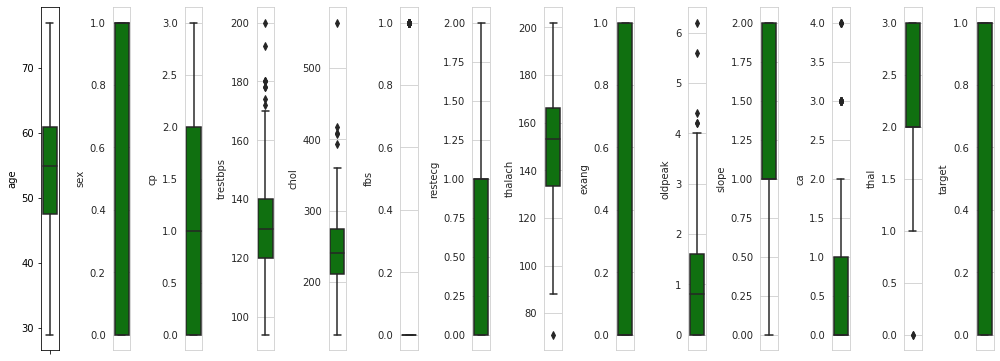

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sea
df = pd.read_csv('heart.csv')
# df.head()
# df.shape 
df.info()
#df.describe()
# df.cp.unique()
# df.cp.value_counts()
cor_mat = df.corr()

l = df.columns.values
number_of_columns=14
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sea.set_style('whitegrid')
    sea.boxplot(df[l[i]],color='green',orient='v')
    plt.tight_layout()
    
l

In [20]:
df.cp.unique()

array([3, 2, 1, 0])

In [21]:
df.cp.value_counts()


0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [23]:
df.shape 

(303, 14)

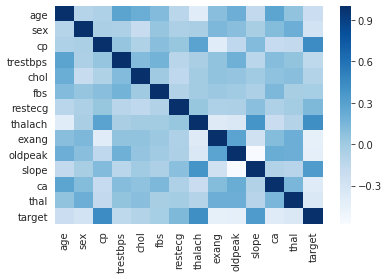

In [15]:
plt.figure(figsize=(6,4))
sea.heatmap(df.corr(),cmap='Blues',annot=False) 

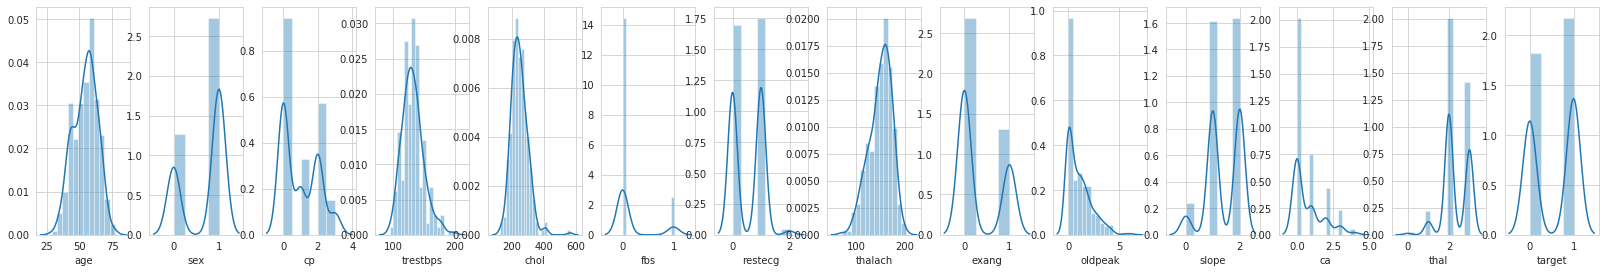

In [4]:
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sea.distplot(df[l[i]],kde=True) 

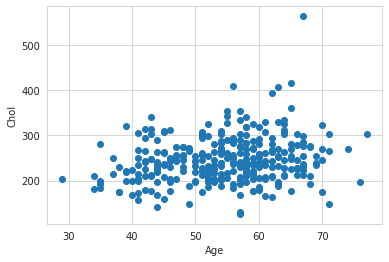

In [6]:
plt.scatter(df['age'],df['chol'])
plt.xlabel('Age')
plt.ylabel('Chol')
plt.show()

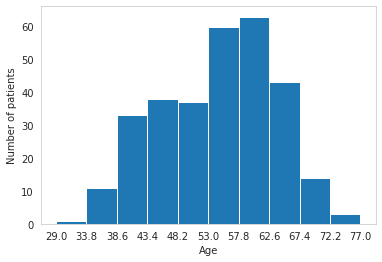

In [7]:
count,bin_edges = np.histogram(df['age'])
df['age'].plot(kind='hist',xticks=bin_edges)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.grid()
plt.show()

In [14]:
df_temp = df[['age','sex','chol']]
df_group = df_temp.groupby(['age','sex'],as_index=False).mean()
print(df_group)

    age  sex        chol
0    29    1  204.000000
1    34    0  210.000000
2    34    1  182.000000
3    35    0  183.000000
4    35    1  224.000000
5    37    0  215.000000
6    37    1  250.000000
7    38    1  193.666667
8    39    0  209.500000
9    39    1  270.000000
10   40    1  196.333333
11   41    0  244.000000
12   41    1  205.166667
13   42    0  237.000000
14   42    1  250.000000
15   43    0  277.000000
16   43    1  250.000000
17   44    0  191.500000
18   44    1  228.000000
19   45    0  210.000000
20   45    1  269.800000
21   46    0  208.000000
22   46    1  247.000000
23   47    1  246.400000
24   48    0  275.000000
25   48    1  246.833333
26   49    0  270.000000
27   49    1  201.000000
28   50    0  239.000000
29   50    1  218.000000
..  ...  ...         ...
43   57    1  224.692308
44   58    0  268.666667
45   58    1  248.000000
46   59    0  249.000000
47   59    1  239.153846
48   60    0  248.500000
49   60    1  243.857143
50   61    0  318.500000


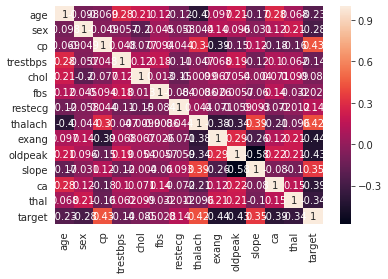

In [17]:
correlation_matrix = df.corr()
sea.heatmap(correlation_matrix, annot=True)
plt.show()

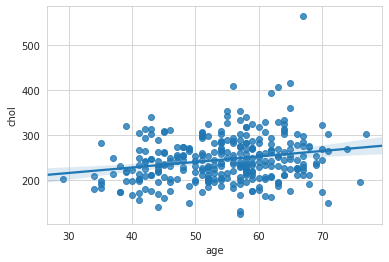

In [19]:
sea.regplot(x='age',y='chol',data=df)